In [1]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import os
import xarray
import pickle
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy
import datetime
from ll_xy import lonlat_to_xy
import matplotlib.pyplot as plt
import kuka_tools as kt
from scipy.stats import binned_statistic

In [2]:
dir = '../../data/rothera//20230904'

In [3]:
listfiles = os.listdir(dir)
listfiles

ku_files = sorted([f for f in listfiles if 'Ka-Scat' in f])
# ka_files = sorted([f for f in listfiles if 'Ka-Scat' in f])

ku_files

['kuka_stare_decon_Ka-Scat20230904-104752.nc',
 'kuka_stare_decon_Ka-Scat20230904-105252.nc',
 'kuka_stare_decon_Ka-Scat20230904-105752.nc',
 'kuka_stare_decon_Ka-Scat20230904-145254.nc',
 'kuka_stare_decon_Ka-Scat20230904-145606.nc']

Text(0, 0.5, 'y distance (m)')

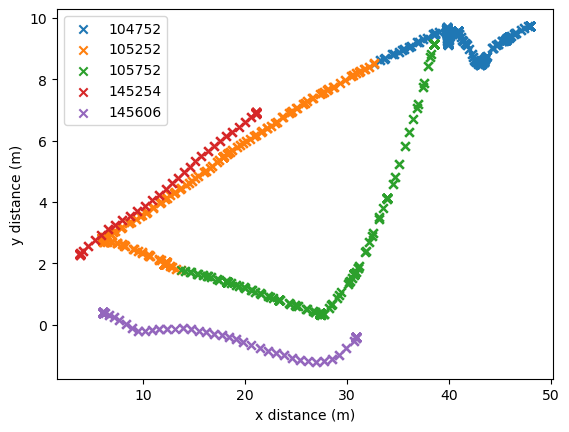

In [4]:

x,y=kt.plot_pos(ku_files[0],dir,plot=False)

x0 = -2300414.994491106; y0 = 923485.871699531

xy_dict = {}

for f in sorted(ku_files):

    x,y = kt.plot_pos(f,dir,x0=x0,y0=y0)

    xy_dict[f] = (x,y)
    
plt.legend()
plt.xlabel('x distance (m)')
plt.ylabel('y distance (m)')


In [5]:
x1 = xy_dict[ku_files[1]][0]
y1 = xy_dict[ku_files[1]][1]

x2 = xy_dict[ku_files[2]][0]
y2 = xy_dict[ku_files[2]][1]

x = np.array(list(x1)+list(x2))
y = np.array(list(y1)+list(y2))

d1=Dataset(f'{dir}/{ku_files[1]}')
times1 = [datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(x)) for x in d1['start_time']]

d2=Dataset(f'{dir}/{ku_files[2]}')
times2 = [datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(x)) for x in d2['start_time']]

times = np.array(times1+times2)


nrcs1 = kt.get_nrcs(d1,'ka')
nrcs2 = kt.get_nrcs(d2,'ka')

nrcs = {}
for key in nrcs1.keys():

    nrcs[key] = np.hstack([nrcs1[key],nrcs2[key]])

nrcs=pd.DataFrame(nrcs)

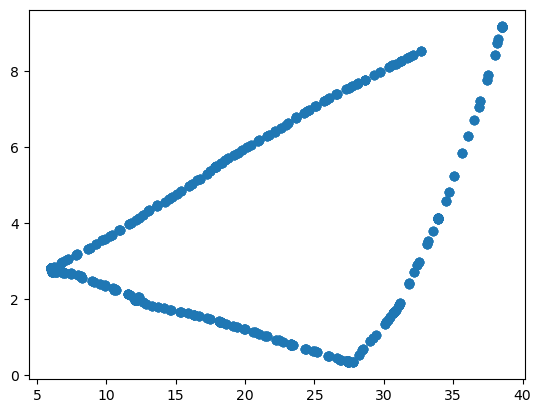

In [6]:
plt.scatter(x,y)

360 1549


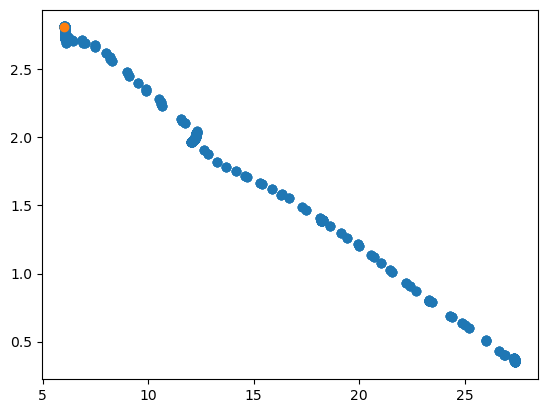

In [7]:
mintime,maxtime=np.argmin(x),np.argmin(y)
plt.scatter(x[mintime:maxtime],y[mintime:maxtime])
# plt.ylim(-10,0)
# plt.xlim(-45,-10)
print(mintime,maxtime)
plt.scatter(x[mintime],y[mintime])

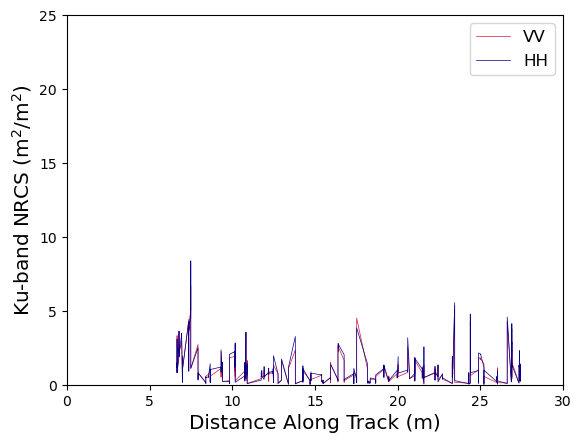

In [8]:
x_ = 0; y_ = 0

along_track = np.sqrt((x-x_)**2 + (y-y_)**2)
xdiff = np.diff(x)
ydiff = np.diff(y)
speed = np.sqrt(np.square(xdiff)+np.square(ydiff))
speed=list(speed)+[0]
nrcs['along_track']=along_track
nrcs['speed']=speed


nrcs_return = nrcs.iloc[mintime:maxtime]

nrcs_return = nrcs_return.sort_values('along_track').reset_index()

nrcs_return = nrcs_return[nrcs_return['along_track']<30]

plt.plot(nrcs_return['along_track'],
         nrcs_return['vv'],
         label='VV',
         lw=0.5,
         color='crimson')

plt.plot(nrcs_return['along_track'],
         nrcs_return['hh'],
         label='HH',
         lw=0.5,
         color='darkblue')

plt.ylabel('Ku-band NRCS (m$^2$/m$^2$)',fontsize='x-large')
plt.xlabel('Distance Along Track (m)',fontsize='x-large')



# plt.axvspan(start_along_track,end_along_track,color='grey',alpha=0.2)
plt.ylim(0,25)
plt.xlim(0,30)
plt.legend(fontsize='large')
plt.show()

In [9]:
pickle.dump(nrcs_return,open('../../data/pickles/NRCS_904_KA.p','wb'))

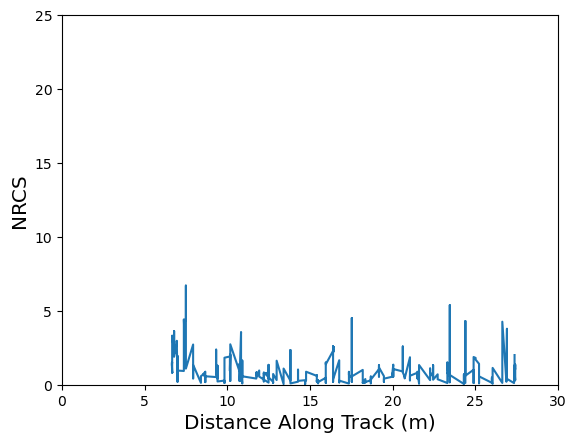

0.8669074582920757


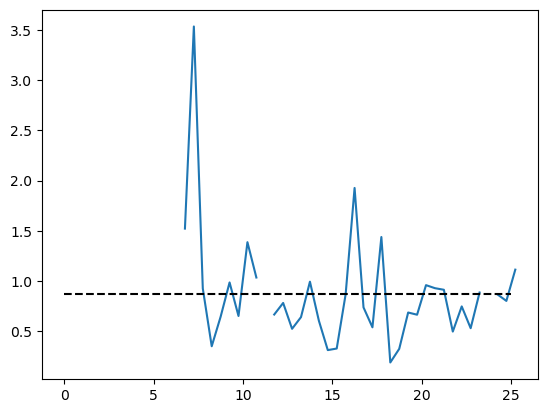

In [10]:
pickle_file = '../../data/pickles/904_trans.p'
pickle.dump( (along_track,nrcs), open(pickle_file,'wb'))

plt.plot(along_track[mintime:maxtime],nrcs['vv'][mintime:maxtime])
bs = binned_statistic(along_track[mintime:maxtime],nrcs['vv'][mintime:maxtime],
                      statistic='mean',bins=np.arange(0,26.1,0.5))

plt.ylabel('NRCS',fontsize='x-large')
plt.xlabel('Distance Along Track (m)',fontsize='x-large')
plt.ylim(0,25)
plt.xlim(0,30)

plt.show()

bin_centres = np.arange(0.25,26.01,0.5)

plt.plot(bin_centres,bs[0])

thresh=25

mean = np.nanmean(bs[0][bin_centres<thresh])

plt.plot([0,thresh],[mean,mean],color='k',ls='--')

print(mean)

plt.show()

In [11]:
along_track.shape

(1849,)

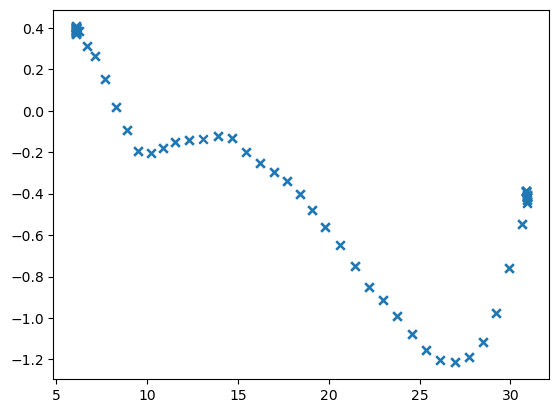

In [12]:
for f in ku_files[-1:]:
    x,y = kt.plot_pos(f,dir,x0=x0,y0=y0)


[]

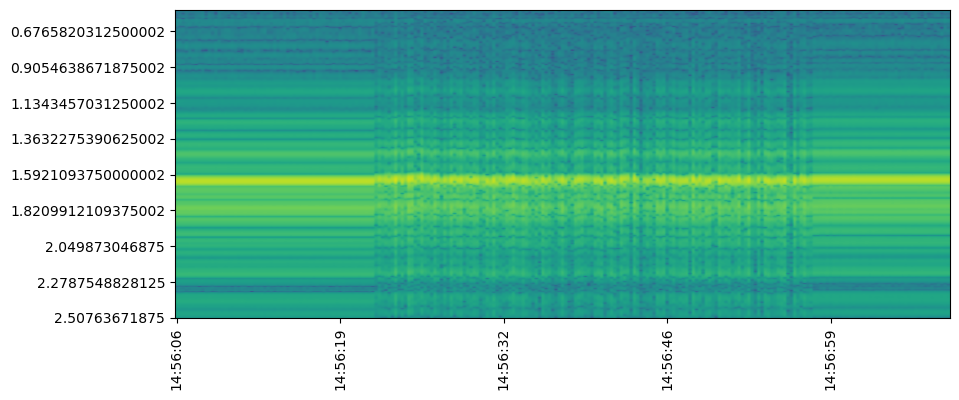

In [13]:
kt.plot_file(f,'ka',dir)

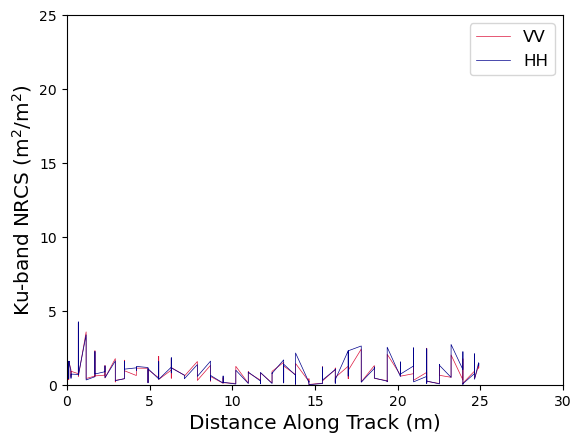

In [17]:
foi = ku_files[-1]
d = Dataset(f'{dir}/{foi}')

range = np.array(d['range'])

time_offset_s=0
times = np.array([datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(x))+datetime.timedelta(seconds=int(time_offset_s)) for x in d['start_time']])

mintime=0;maxtime=-1


x_ = 0; y_ = 0

along_track = np.sqrt((x-x_)**2 + (y-y_)**2)


nrcs = pd.DataFrame(kt.get_nrcs(d,'ka'))

along_track = np.sqrt((x-x_)**2 + (y-y_)**2)-6
xdiff = np.diff(x)
ydiff = np.diff(y)
speed = np.sqrt(np.square(xdiff)+np.square(ydiff))
speed=list(speed)+[0]
nrcs['along_track']=along_track
nrcs['speed']=speed


nrcs_return = nrcs.iloc[mintime:maxtime]

nrcs_return = nrcs_return.sort_values('along_track').reset_index()

nrcs_return = nrcs_return[nrcs_return['along_track']<30]

plt.plot(nrcs_return['along_track'],
         nrcs_return['vv'],
         label='VV',
         lw=0.5,
         color='crimson')

plt.plot(nrcs_return['along_track'],
         nrcs_return['hh'],
         label='HH',
         lw=0.5,
         color='darkblue')

plt.ylabel('Ku-band NRCS (m$^2$/m$^2$)',fontsize='x-large')
plt.xlabel('Distance Along Track (m)',fontsize='x-large')



# plt.axvspan(start_along_track,end_along_track,color='grey',alpha=0.2)
plt.ylim(0,25)
plt.xlim(0,30)
plt.legend(fontsize='large')
plt.show()

In [18]:
pickle.dump(nrcs_return,open('../../data/pickles/NRCS_904_KAb.p','wb'))

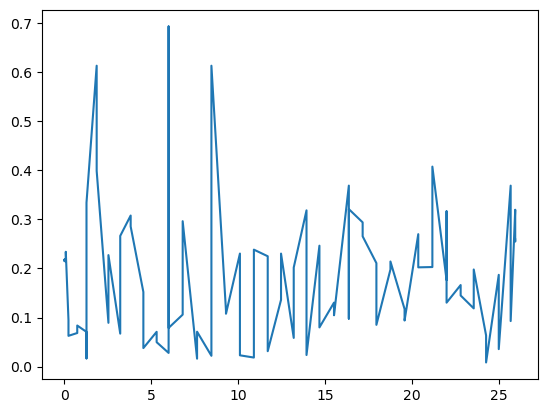

0.177504549505751


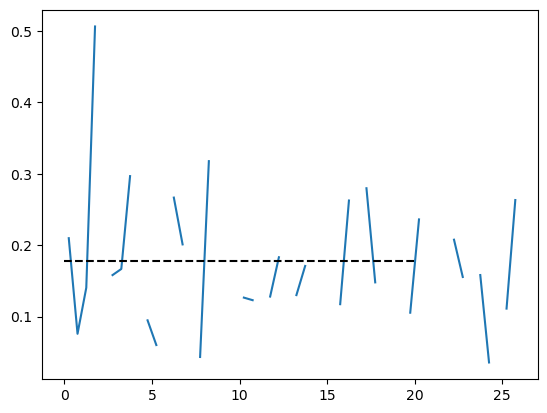

In [51]:
foi = ku_files[-1]
d = Dataset(f'{dir}/{foi}')

range = np.array(d['range'])

time_offset_s=0
times = np.array([datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(x))+datetime.timedelta(seconds=int(time_offset_s)) for x in d['start_time']])

mintime = kt.get_time_index(datetime.datetime(2023,9,4,14,56,20),times)
maxtime = kt.get_time_index(datetime.datetime(2023,9,4,14,57,0),times)
mintime=0;maxtime=134


x_ = x[mintime]; y_ = y[mintime]

along_track = np.sqrt((x-x_)**2 + (y-y_)**2)


minrange, maxrange = kt.get_range_index(1.3,range),kt.get_range_index(2,range)

pol = 'vv'

vv_power = np.array(d[f'{pol}_power_decon0'])
vv_power_in_range = np.sum(vv_power[minrange:maxrange],axis=0)
plt.plot(along_track[mintime:maxtime],vv_power_in_range[mintime:maxtime])
bs = binned_statistic(along_track[mintime:maxtime],vv_power_in_range[mintime:maxtime],
                      statistic='mean',bins=np.arange(0,26.1,0.5))

plt.show()

bin_centres = np.arange(0.25,26.01,0.5)

plt.plot(bin_centres,bs[0])

mean = np.nanmean(bs[0][bin_centres<20])

plt.plot([0,20],[mean,mean],color='k',ls='--')

print(mean)

plt.show()
